<a href="https://colab.research.google.com/github/rajeshmay09/MalariaTransfer1/blob/main/XceptionFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras import layers
from keras.layers import Input, Dense, Activation, BatchNormalization, Dropout, Flatten
from keras.layers import Dropout, GlobalAveragePooling2D
from keras.models import Model, load_model

from keras.preprocessing.image import ImageDataGenerator
from keras.applications.xception import Xception
from keras.applications.xception import preprocess_input
from keras.preprocessing import image
from keras.models import Model, load_model
from keras.models import Sequential

In [ ]:
image_size = 224
batch_size = 32

In [ ]:
train_dir = '/content/drive/MyDrive/TRAIN'
test_dir = '/content/drive/MyDrive/TEST'

input_shape = (image_size, image_size, 3)

In [ ]:
train_datagen= ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    
    rotation_range=0.5
)

In [ ]:
train_generator= train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 40000 images belonging to 2 classes.


In [ ]:
test_datagen= ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(image_size, image_size),
    batch_size=batch_size,
    class_mode='categorical')

Found 10000 images belonging to 2 classes.


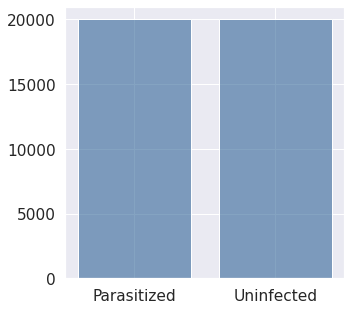

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
cls_train = train_generator.classes
from collections import OrderedDict
classes = list(train_generator.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_train, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(2):
  num_values.append(valdict[i])
plt.figure(figsize=(5,5))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values,color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(x, xlabel)
plt.show()

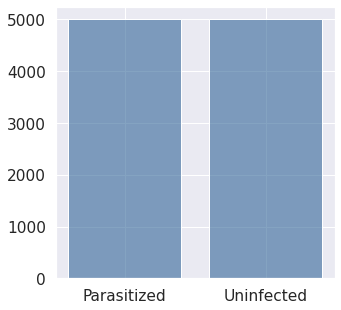

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
cls_test = test_generator.classes
from collections import OrderedDict


classes = list(test_generator.class_indices.keys())
num_values = []
unique, counts = np.unique(cls_test, return_counts=True)
valdict=OrderedDict(zip(unique, counts))
for i in range(2):
    num_values.append(valdict[i])
plt.figure(figsize=(5,5))
x = np.arange(len(num_values))
xlabel = classes
plt.bar(x, num_values,color=(0.2, 0.4, 0.6, 0.6))
plt.xticks(x, xlabel)
plt.show()

In [ ]:
base_model = Xception(weights='imagenet',
                      input_shape=(224, 224, 3),
                      include_top=False)  

for layer in base_model.layers:
    layer.trainable = False

83683744/83683744 [==============================] - 1s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128)(x)
x = Activation('relu')(x)
x = Dropout(0.2)(x)
x = Dense(64)(x)
x = Activation('relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam', 
              metrics=['accuracy'])


In [ ]:
r = model.fit_generator(
  train_generator,
  validation_data=test_generator,
  epochs=25,
  steps_per_epoch=len(train_generator),
  validation_steps=len(test_generator),
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/25
500/500 [==============================] - 14365s 29s/step - loss: 0.2183 - accuracy: 0.9179 - val_loss: 0.2537 - val_accuracy: 0.9030
Epoch 2/25
500/500 [==============================] - 215s 429ms/step - loss: 0.1755 - accuracy: 0.9349 - val_loss: 0.2593 - val_accuracy: 0.9122
Epoch 3/25
500/500 [==============================] - 215s 430ms/step - loss: 0.1662 - accuracy: 0.9392 - val_loss: 0.2458 - val_accuracy: 0.9072
Epoch 4/25
500/500 [==============================] - 214s 429ms/step - loss: 0.1551 - accuracy: 0.9411 - val_loss: 0.2795 - val_accuracy: 0.8917
Epoch 5/25
500/500 [==============================] - 218s 435ms/step - loss: 0.1548 - accuracy: 0.9431 - val_loss: 0.2330 - val_accuracy: 0.9128
Epoch 6/25
500/500 [==============================] - 214s 429ms/step - loss: 0.1481 - accuracy: 0.9456 - val_loss: 0.3567 - val_accuracy: 0.8553
Epoch 7/25
500/500 [==============================] - 212s 424ms/step - loss: 0.1467 - accuracy: 0.9466 - val_loss: 0.3218 -

In [ ]:
from keras.models import load_model
model.save('models/model_xception.h5')

Text(0.5, 1.0, 'Accuracy Curves')

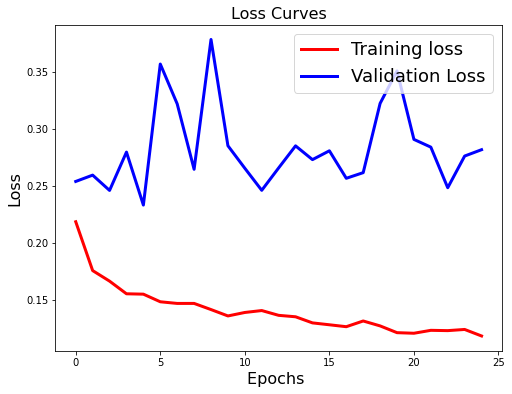

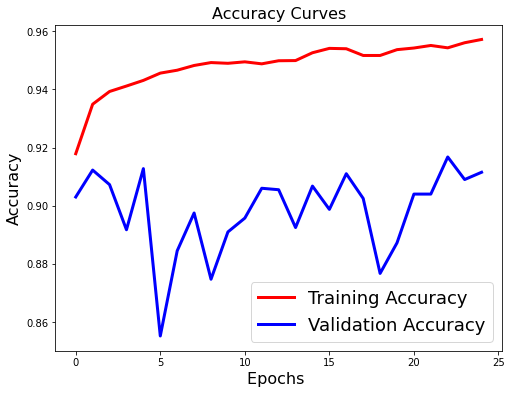

In [ ]:
plt.figure(figsize=[8,6])
plt.plot(r.history['loss'],'r',linewidth=3.0)
plt.plot(r.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
print()
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(r.history['accuracy'],'r',linewidth=3.0)
plt.plot(r.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

313/313 [==============================] - 2613s 8s/step


In [ ]:
train_generator.class_indices

{'Parasitized': 0, 'Uninfected': 1}

Confusion Matrix


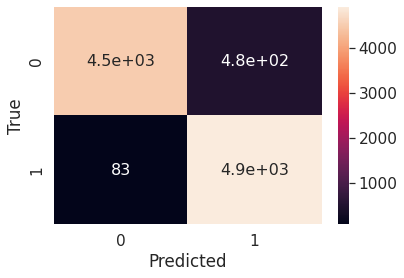

[[4519  481]
 [  83 4917]]


In [ ]:
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
sns.set(font_scale=1.4) # for label size
sns.heatmap(cm, annot=True, annot_kws={"size": 16}) # font size
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()
print(cm)


In [ ]:
print('Classification Report')
print(classification_report(testing_generator.classes, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       0.98      0.90      0.94      5000
           1       0.91      0.98      0.95      5000

    accuracy                           0.94     10000
   macro avg       0.95      0.94      0.94     10000
weighted avg       0.95      0.94      0.94     10000



In [ ]:
img2='/content/drive/MyDrive/TEST/Uninfected/C103P64ThinF_IMG_20150918_164250_cell_39.png'

In [ ]:
import keras
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
img3 = load_img(img2, target_size=(224, 224))
x= img_to_array(img3)
x/=255
x=np.expand_dims(x,axis=0)
yp1=model.predict(x)
a1= np.argmax(yp1,axis=1)

1/1 [==============================] - 0s 35ms/step


In [ ]:

img = mpimg.imread(img2)

Uninfected


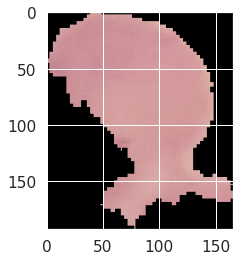

In [ ]:
if(a1==1):
  print("Uninfected")
  imgplot = plt.imshow(img)
  plt.show()
else:
  print("Infected")
  imgplot = plt.imshow(img)
  plt.show()

In [ ]:
img2='/content/drive/MyDrive/TEST/Parasitized/C116P77ThinF_IMG_20150930_171739_cell_92.png'

In [ ]:
img3 = load_img(img2, target_size=(224, 224))
x= img_to_array(img3)
x/=255
x=np.expand_dims(x,axis=0)
yp1=model.predict(x)
a1= np.argmax(yp1,axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
img = mpimg.imread(img2)

Infected


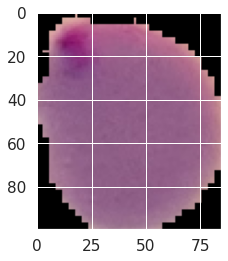

In [ ]:
if(a1==1):
  print("Uninfected")
  imgplot = plt.imshow(img)
  plt.show()
else:
  print("Infected")
  imgplot = plt.imshow(img)
  plt.show()